In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('simulaciones.csv', nrows=21164642)

In [32]:
print(data.shape)
data.head()

(21164642, 12)


,Identificador,Numero_agentes,Tipo_red,Agente,Ronda,Estado,Puntaje,Politica,Parametro-0,Parametro-1,Politica_lag,Consistencia
0,0,5,Full,0,0,0,0,5,5,1,NaN,NaN
1,0,5,Full,0,1,1,-1,0,5,1,5.0,0.0
2,0,5,Full,0,2,0,0,0,5,1,0.0,1.0
3,0,5,Full,0,3,0,0,0,5,1,0.0,1.0
4,0,5,Full,0,4,0,0,0,5,1,0.0,1.0


In [6]:
data_full = data.query('Tipo_red=="Full"').copy()

In [14]:
data_full.Numero_agentes.unique()

array([   5,    6,   10,   11,  101, 1000])

In [31]:
experimentos = data_full.groupby('Numero_agentes')['Identificador'].unique()
experimentos = experimentos.apply(len)
experimentos

Numero_agentes
5       100
6       100
10      100
11      100
101     100
1000     58
Name: Identificador, dtype: int64

Medida de asistencia óptima al bar El Farol:

Es un número entre 0 y 1, donde 1 significa que en todas las rondas, la asistencia al bar fue de 0.5; 0 significa que o bien la asistencia en todas las rondas fue 0 o 1.

$$ 1 - 2*\sqrt{\frac{\sum_{r}(Asistencia_{r} - 0.5)^2}{R}}$$

In [15]:
aux = data_full.groupby(['Numero_agentes', 'Identificador', 'Ronda'])['Estado']\
    .sum().reset_index()
aux.columns = ['Numero_agentes',
               'Identificador',
               'Ronda', 
               'Asistencia_total']

# Proporción de asistencia
aux['Asistencia'] = aux['Asistencia_total']/aux['Numero_agentes']
# Distancia al cuadrado entre proporción de asistencia y 0.5
aux['diferencia_con_umbral'] = (aux['Asistencia'] - 0.5)*(aux['Asistencia'] - 0.5)
aux.head()

,Numero_agentes,Identificador,Ronda,Asistencia_total,Asistencia,diferencia_con_umbral
0,5,0,0,2,0.4,0.01
1,5,0,1,3,0.6,0.01
2,5,0,2,1,0.2,0.09
3,5,0,3,0,0.0,0.25
4,5,0,4,0,0.0,0.25


In [17]:
num_rondas = aux.Ronda.max() + 1
num_rondas

300

In [18]:
df = aux.groupby(['Numero_agentes', 'Identificador'])['diferencia_con_umbral'].sum().reset_index()
df['Asistencia_optima'] = df['diferencia_con_umbral']/num_rondas
df['Asistencia_optima'] = 1 - 2 * np.sqrt(df['Asistencia_optima'])
df.head()

,Numero_agentes,Identificador,diferencia_con_umbral,Asistencia_optima
0,5,0,74.36,0.004276
1,5,1,3.00,0.800000
2,5,2,74.60,0.002670
3,5,3,74.52,0.003205
4,5,4,74.20,0.005348


In [19]:
df['Asistencia_optima'].describe()

count    558.000000
mean       0.291472
std        0.373078
min        0.000000
25%        0.004082
50%        0.006496
75%        0.713164
max        1.000000
Name: Asistencia_optima, dtype: float64

Text(0, 0.5, 'Frecuencia')

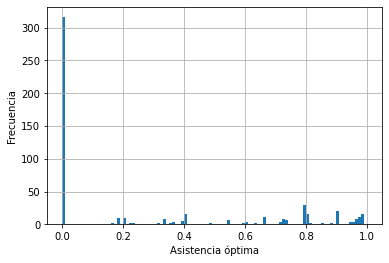

In [23]:
df['Asistencia_optima'].hist(bins = 100)
plt.xlabel('Asistencia óptima')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Promedio asistencia óptima\nsobre 100 simulaciones')

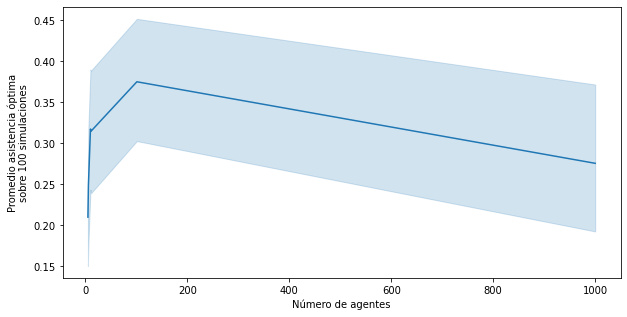

In [28]:
fig = plt.subplots(figsize=(10,5))
sns.lineplot(x=df['Numero_agentes'], y=df['Asistencia_optima'])
plt.xlabel('Número de agentes')
plt.ylabel('Promedio asistencia óptima\nsobre 100 simulaciones')

Medida de recompensa total:

$$\frac{\sum_{a, r, e} recompensa(a, r, e)}{A*R*E}$$

Medida de equidad en al distribución de recursos:

Índice de Gini:

$$\frac{\sum_i\sum_j |recompensa(i) - recompensa(j)|}{2\sum_i\sum_j recompensa(j)}$$